In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import matplotlib.pylab as plt
import numpy as np
from eapprocessor.hwsimulator.adc import convert_array, convert_lcadc, normalize,dac

# Coherent vs no-coherent sampling

## Coherent

In [57]:
periods=7
n_samples=128
Fs=20e3
resolution=8

In [87]:
def generate_signals(periods,n_samples,Fs,resolution=8):
    F=periods*Fs/samples
    time = np.linspace(0, n_samples/Fs, n_samples, endpoint=False)
    signal = np.sin(2 * np.pi * F * time)
    quantized = convert_array(signal, 1, resolution, bipolar=True, operator=round)
    return time, signal, quantized

In [88]:
time, signal, quantized = generate_signals(periods,n_samples,Fs,resolution)

value:0.0, latest ref: 0, step:0.0078125
value:0.33688985339222005, latest ref: 0.0, step:0.0078125
Append value:43
value:0.6343932841636455, latest ref: 0.3359375, step:0.0078125
Append value:38
value:0.8577286100002721, latest ref: 0.6328125, step:0.0078125
Append value:28
value:0.9807852804032304, latest ref: 0.8515625, step:0.0078125
Append value:16
value:0.989176509964781, latest ref: 0.9765625, step:0.0078125
Append value:1
value:0.881921264348355, latest ref: 0.984375, step:0.0078125
Append value:-13
value:0.6715589548470186, latest ref: 0.8828125, step:0.0078125
Append value:-27
value:0.3826834323650899, latest ref: 0.671875, step:0.0078125
Append value:-37
value:0.049067674327417966, latest ref: 0.3828125, step:0.0078125
Append value:-42
value:-0.2902846772544621, latest ref: 0.0546875, step:0.0078125
Append value:-44
value:-0.5956993044924332, latest ref: -0.2890625, step:0.0078125
Append value:-39
value:-0.8314696123025452, latest ref: -0.59375, step:0.0078125
Append value:-

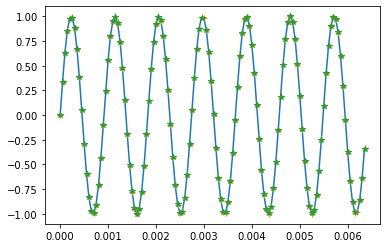

In [89]:
plt.plot(time, signal)
plt.plot(time, dac(quantized, 1,8,True),"+")
#plt.plot(time[indexes], dac(lcadc, 1,8,True), '*')

In [61]:
from eapprocessor.tools.fft import fft

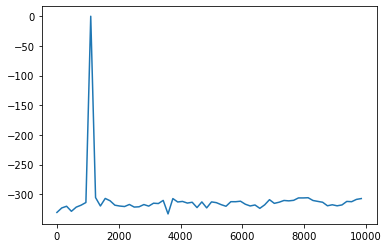

In [62]:
xf, yf = fft(signal, Fs)
plt.plot(xf,10*np.log10(np.power(yf,2)))

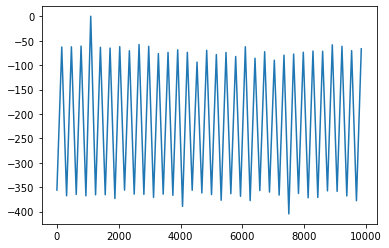

In [63]:
xf_q, yf_q = fft(dac(quantized, 1,8,True)+1e-17, Fs)
plt.plot(xf_q,10*np.log10(np.power(yf_q,2)))

In [64]:
from eapprocessor.tools.metrics import calculate_snr, calculate_enob

In [65]:
calculate_snr(yf)

294.3612867464666

In [66]:
calculate_snr(yf_q)

50.35704062476857

## Non-coherent

In [75]:
time, signal, quantized = generate_signals(16,n_samples,Fs,resolution)

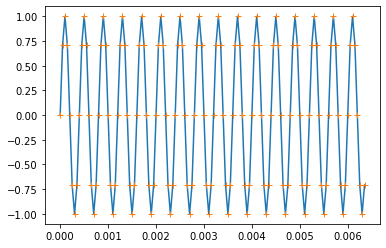

In [76]:
plt.plot(time, signal)
plt.plot(time, dac(quantized, 1,8,True),"+")

In [80]:
xf, yf = fft(signal, Fs)
xf_q, yf_q = fft(dac(quantized, 1,8,True), Fs)

In [81]:
calculate_snr(yf)

287.78691818235814

In [82]:
calculate_snr(yf_q)

51.368190362912365

# LCADC conversion

In [172]:
R=128
periods=7
n_samples=128
Fs=20e3

In [206]:
def generate_lcadc(periods,n_samples,Fs,R=1,resolution=8):
    F=periods*Fs/samples
    time = np.linspace(0, (n_samples+2)/Fs, (n_samples+2)*R, endpoint=False)
    signal = np.sin(2 * np.pi * F * time)
    quantized = convert_array(signal, 1, resolution, bipolar=True, operator=round)
    indexes, lcadc = convert_lcadc(signal, 1, resolution, bipolar=True, verbose=False)
    return time, signal, quantized, (indexes, lcadc)

In [207]:
time, signal, quantized, (indexes, lcadc) = generate_lcadc(periods,n_samples,Fs,R=R)

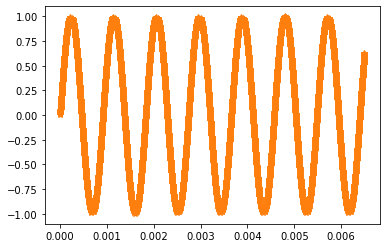

In [208]:
plt.plot(time, signal)
plt.plot(time[indexes], dac(lcadc, 1,8,True), '*')

In [176]:
from eapprocessor.tools.resample import resample

In [177]:
len(indexes), len(time), indexes[0], indexes[-1]

(3641, 16640, 0, 16636)

In [178]:
n_time = np.linspace(0, (n_samples)/Fs, (n_samples)*R, endpoint=False)

In [180]:
n_signal= resample(time[indexes], dac(lcadc, 1,8,True),n_time,3)

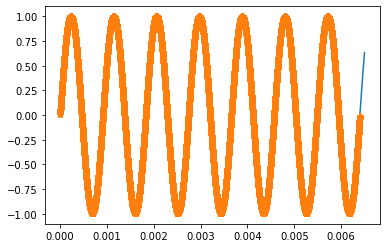

In [214]:
plt.plot(time, signal)
plt.plot(n_time, n_signal, '*')

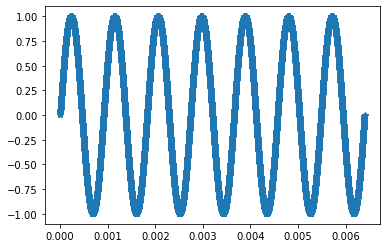

In [215]:
plt.plot(time[0:len(n_time)], dac(quantized[0:len(n_time)], 1,8,True), '*')

In [195]:
len(n_signal)

16384

In [209]:
xf_q, yf_q = fft(n_signal, Fs*R)

In [216]:
xf_qa, yf_qa = fft(dac(quantized[0:len(n_time)], 1,8,True), Fs*R)

In [217]:
calculate_snr(yf_q)

62.40009606720656

In [219]:
calculate_enob(calculate_snr(yf_q))

10.073105659004414

In [218]:
calculate_snr(yf_qa)

50.02192539479562

In [188]:
from eapprocessor.tools.resample import resample, decimate

In [202]:
d_time,d_signal= decimate(n_time, n_signal,16)
d_time,d_signal= decimate(d_time, d_signal,8)

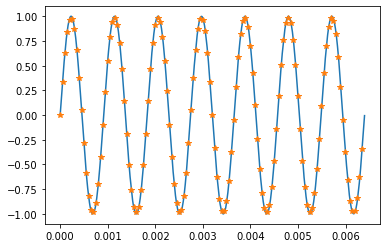

In [203]:
plt.plot(n_time, n_signal)
plt.plot(d_time, d_signal,"*")

In [204]:
xf_q, yf_q = fft(d_signal, Fs)

In [205]:
calculate_snr(yf_q)

55.53244083024794